<div class="alert alert-block alert-success">
<b>imported libraries</b>
</div>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy.stats import norm, skew, kurtosis
from matplotlib.ticker import AutoMinorLocator

plt.style.use('dark_background')

<div class="alert alert-block alert-info">
<b>Load data and see info</b>
</div>

In [2]:
df = pd.read_csv('DAYTON_hourly.csv')
df.rename(columns ={'DAYTON_MW': 'value', 'Datetime': 'date'}, inplace = True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
# Return an Index of formatted datetime strings
# df['date'] = df['date'].dt.strftime('%Y/%m/%d %H:%M:%S')
df.set_index('date', inplace = True)
df.sort_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121275 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   value   121275 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


<div class="alert alert-block alert-info">
<b>Plot original time series and measure skewness</b>
</div>

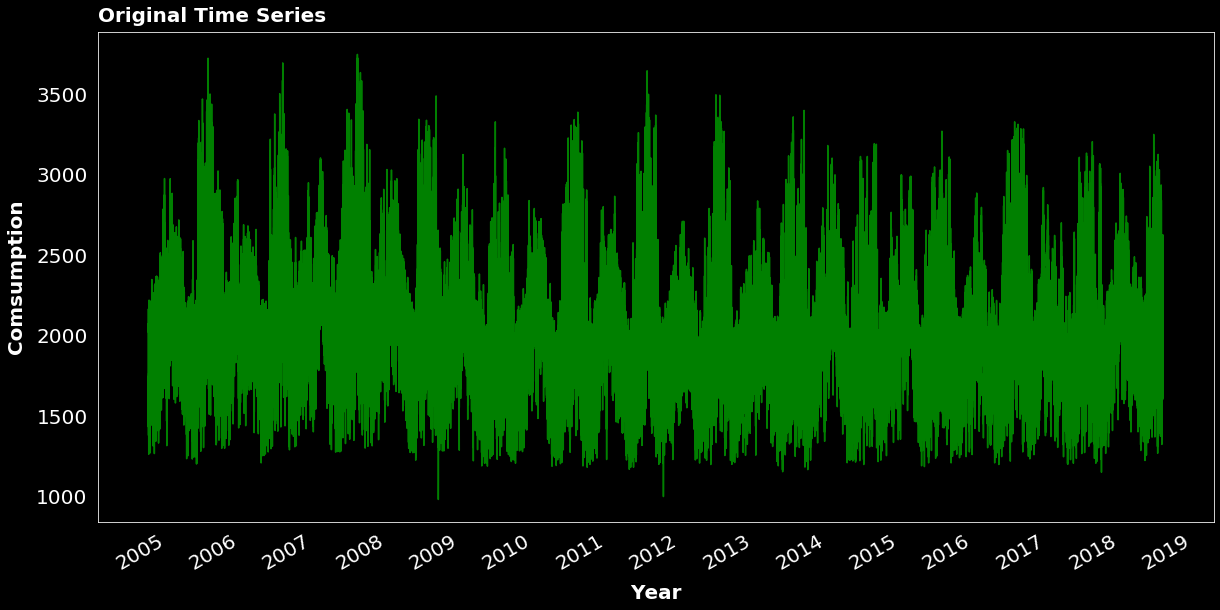

skewness: 0.523790
Kurtosis: 0.254117


In [3]:
plt.figure(figsize = (20,10))
plt.tight_layout()  
plt.title('Original Time Series', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Comsumption', weight = 'bold', fontsize = 20,  labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)                                                                           
plt.plot(df.index, df['value'], color = 'green')
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) 
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(axis = 'both', which = 'major', color = 'black', length = 0, pad = 10)
plt.show()

print('skewness: %f' %skew(df['value']))
print('Kurtosis: %f' % kurtosis(df['value']))

In [4]:
year = int(input("Type the year you want from 2004 to 2018: "))
month = int(input("Type the month you want: "))
day = int(input("Type the day from the month you want: "))

Type the year you want from 2004 to 2018: 2010
Type the month you want: 1
Type the day from the month you want: 1


<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

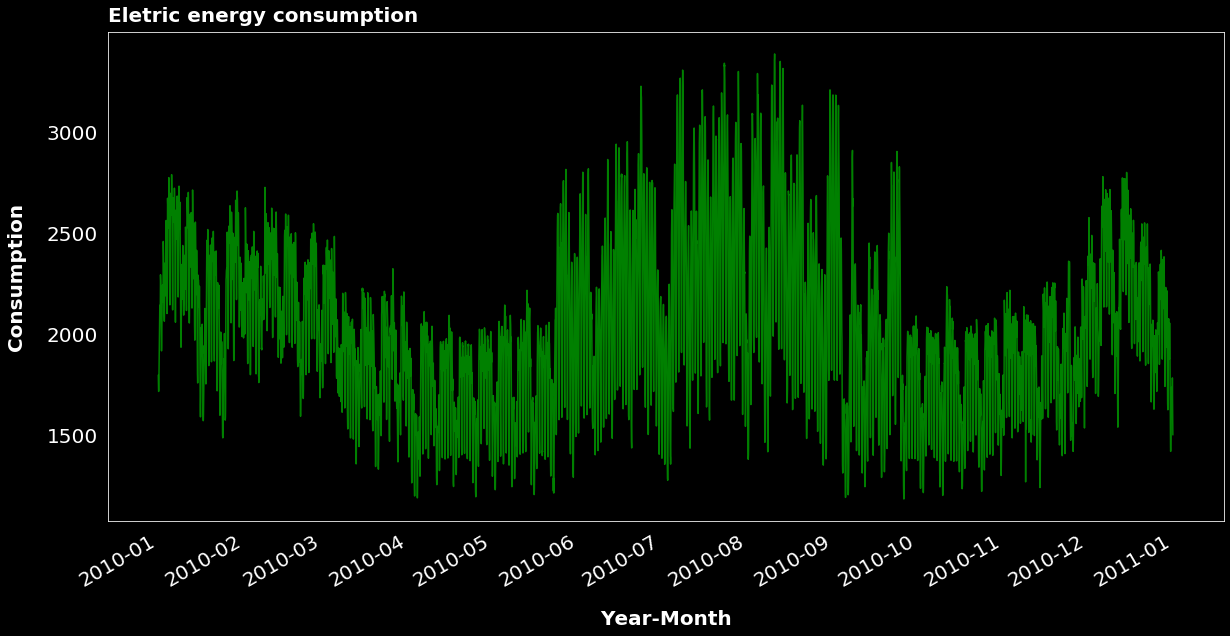

In [5]:
if year > 2003 and year < 2019:
    plt.figure(figsize = (20, 10))
    plt.tight_layout()   
    plt.title('Eletric energy consumption', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
    plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.ylabel('Consumption', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)                                                                           
    dfyear = df[df.index.year == year]
    plt.plot(dfyear.index, dfyear['value'], color = 'green')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%Y-%m')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 1)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tick_params(axis = 'both', which = 'major', color = 'black', length = 0, pad = 10)
    plt.show()
else:
    print('Run again and type a valid year')

<div class="alert alert-block alert-info">
<b>Pick a year and month to plot</b>
</div>

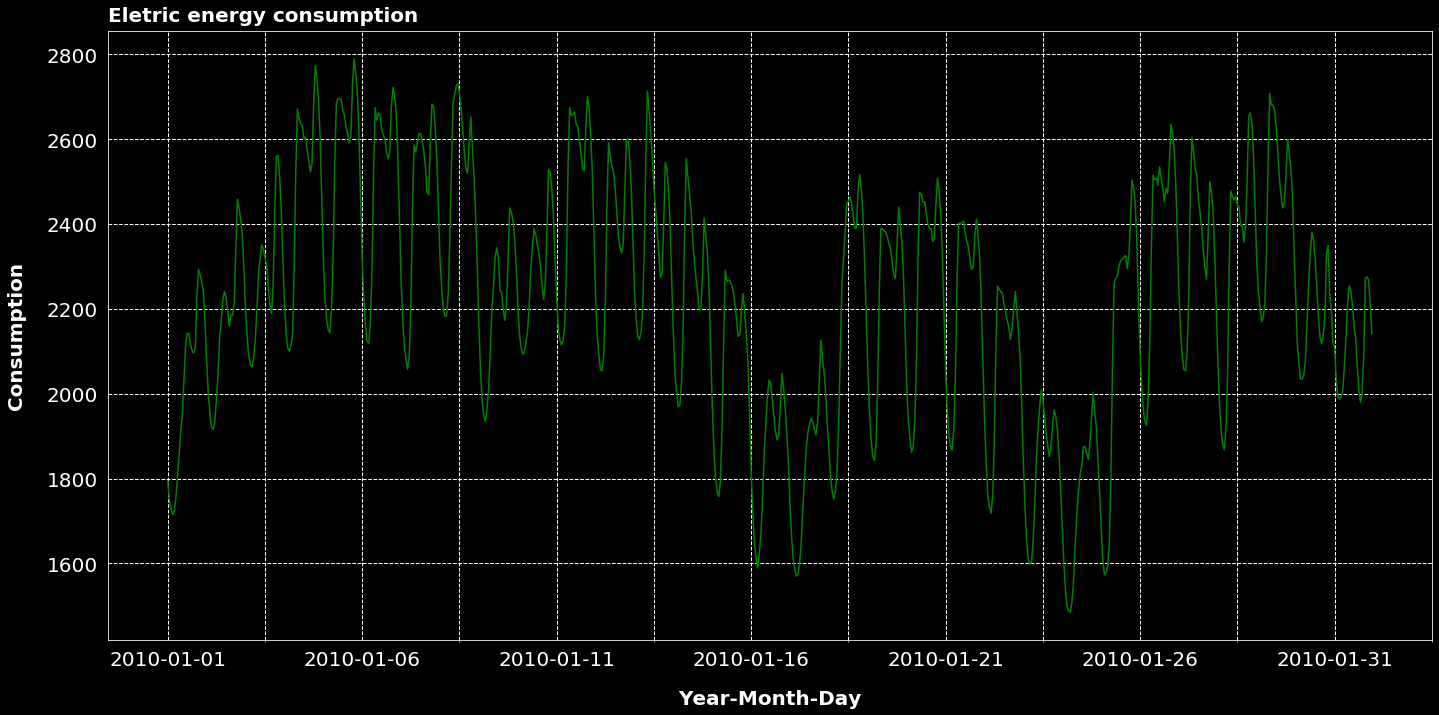

In [6]:
if year > 2003 and year < 2019 and month > 0 and month < 13:
    plt.figure(figsize = (20, 10))
    plt.tight_layout()    
    plt.title('Eletric energy consumption', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
    plt.xlabel('Year-Month-Day', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.ylabel('Consumption', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)                             
    plt.tight_layout()                                                
    dfyear = df[df.index.year == year]
    filtro = (dfyear.index.month == month)
    plt.plot(dfyear[filtro].index, dfyear[filtro]['value'], color = 'green')
    date_format = mdates.DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.grid(axis = 'both', which = 'both', color = 'white', linewidth = 1, linestyle = '--')
    plt.tick_params(axis = 'both', which = 'major', color = 'black', length = 0, pad = 10)
else:
    print('Run again and type a valid date')

<div class="alert alert-block alert-info">
<b>Pick a year, month and day to plot</b>
</div>

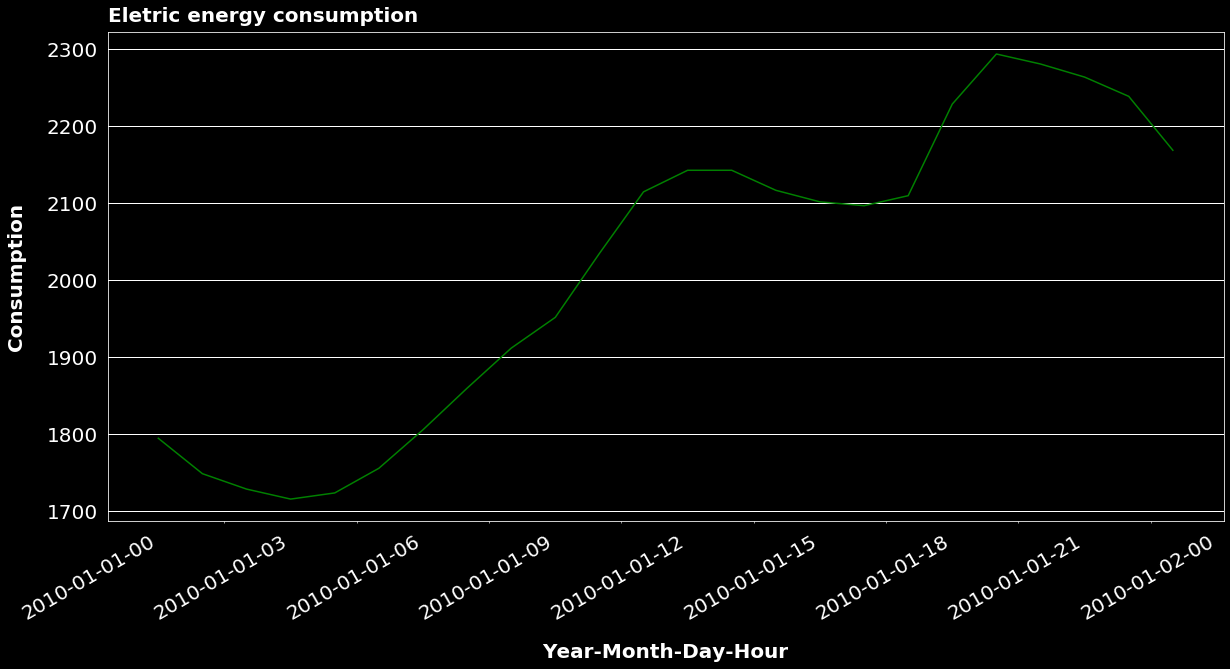

In [7]:
if year > 2003 and year < 2019 and month > 0 and month < 13 and day > 0 and day < 31:
    plt.figure(figsize = (20, 10))
    plt.tight_layout()    
    plt.title('Eletric energy consumption', weight = 'bold', loc = 'left', fontsize = 20, pad = 10)
    plt.xlabel('Year-Month-Day-Hour', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.ylabel('Consumption', weight = 'bold', fontsize = 20, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)                                                                           
    dfyear = df[df.index.year == year]
    filtro = (dfyear.index.month == month) & (dfyear.index.day == day)
    plt.plot(dfyear[filtro].index, dfyear[filtro]['value'], color = 'green')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%Y-%m-%d-%H')
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval = 3)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.grid(axis = 'y', which = 'both', color = 'white', linewidth = 1, linestyle = '-')
    plt.tick_params(axis = 'both', which = 'major', color = 'black', length = 0, pad = 10)
    plt.show()
else:
    print('Run again and type a valid date')